In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
import cv2

from os import listdir
# from numpy import asarray
# from numpy import vstack
# from keras.preprocessing.image import img_to_array
# from keras.preprocessing.image import load_img
# from numpy import savez_compressed
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
def hmi_image_process(image):
    img = np.float32(image[image.files[0]])
    img = cv2.resize(img, (256, 256))
    # img = np.expand_dims(img, axis=2)
    return img

def aia_image_process(image):
    img = np.float32(image[image.files[0]])
    img = cv2.resize(img, (256, 256))
    # img = np.expand_dims(img, axis=2)
    return img

In [3]:
!ls

HMI_AIA_PAIRS.ipynb  dataprep.ipynb  folderA  hmi		    output
aia		     fits_data_code  folderB  making_dataset.ipynb


In [13]:
# source = 'hmi/hmiZ/'
# dest1 = 'folderA/train/'

# files = [f for f in os.listdir(source)]
# counter = 0
# for file in files:
#   shutil.copy(source+file, dest1)
#   counter += 1
# print(counter)

217


In [127]:
# import os
# import glob

# files = glob.glob('folderA/train/*')
# for f in files:
#     os.remove(f)

In [16]:
os.listdir('aia')

['AIA193',
 'AIA304',
 'AIA131',
 'AIA211',
 'AIA335',
 'AIA94',
 'AIA171',
 'AIA1600']

In [114]:
source = 'aia/AIA1600/'    # 94, 131, 171, 193, 211, 304, 335, 1600
dest1 = 'folderB/train/'

files = [f for f in os.listdir(source)]
counter = 0
for file in files:
  shutil.copy(source+file, dest1)
  counter += 1
print(counter)

217


In [125]:
# import os
# import glob

# files = glob.glob('folderB/train/*')
# for f in files:
#     os.remove(f)

In [126]:
len(os.listdir('folderB/train/'))

0

In [123]:
# import os
# import glob

# files = glob.glob('output/train/*')
# for f in files:
#     os.remove(f)

In [124]:
len(os.listdir('output/train/'))

0

In [117]:
import os
import numpy as np
from PIL import Image
import cv2

# define paths for translation from domain A (images in folderA) -> domain B (images in folderB)
folderA = 'folderA'
folderB = 'folderB'
dest_path = 'output'

splits = os.listdir(folderA)

for sp in splits:
    img_fold_A = os.path.join(folderA, sp)
    img_fold_B = os.path.join(folderB, sp)
    hmi_img_list = sorted(os.listdir(img_fold_A))
    aia_img_list = sorted(os.listdir(img_fold_B))
    num_imgs = len(hmi_img_list)
    img_fold_AB = os.path.join(dest_path, sp)
    if not os.path.isdir(img_fold_AB):
        os.makedirs(img_fold_AB)
    print('split = %s, number of images = %d' % (sp, num_imgs))
    for n in range(num_imgs):
        name_A = hmi_img_list[n]
        path_A = os.path.join(img_fold_A, name_A)
        name_B = aia_img_list[n]
        path_B = os.path.join(img_fold_B, name_B)
        if os.path.isfile(path_A) and os.path.isfile(path_B):
            name_AB = f'combined_hmi_aia{n}'   # name_AB = name_A
            path_AB = os.path.join(img_fold_AB, name_AB)
            im_A1 = np.load(path_A)
            im_A1_image = hmi_image_process(im_A1)
            
#             im_A = np.array(im_A1)

            im_B1 = np.load(path_B)
            im_B1_image = aia_image_process(im_B1)
    
#             im_B = np.array(im_B1)

            im_AB_image = np.concatenate([im_A1_image, im_B1_image], 1)
            np.save(path_AB, im_AB_image)

split = train, number of images = 217
split = .ipynb_checkpoints, number of images = 0


In [72]:
# os.listdir('output/train/')

In [118]:
len(os.listdir('output/train/'))

217

In [119]:
# load all images from the directory into memory with appropriate preprocessing

def load_images(path, size=(256, 512)):
    (src_list, tar_list) = (list(), list())

    # enumerate filenames in directory, assuming all are images
    for filename in listdir(path):

        # load and resize the image
        pixels = np.load(path + '/' + filename)

        # convert to numpy array
        pixels = img_to_array(pixels)

        # split into satellite and map
        (sat_img, map_img) = (pixels[:, :256], pixels[:, 256:])
        src_list.append(sat_img)
        tar_list.append(map_img)
    return [asarray(src_list), asarray(tar_list)]

In [120]:
path = 'output/train'

# load dataset
[src_images, tar_images] = load_images(path)
print ('Loaded: ', src_images.shape, tar_images.shape)

Loaded:  (217, 256, 256, 1) (217, 256, 256, 1)


In [121]:
# save as compressed numpy array

filename = 'hmiZ_aia1600_217_256.npz'
savez_compressed(filename, src_images, tar_images)
print ('Saved dataset: ', filename)

Saved dataset:  hmiZ_aia1600_217_256.npz


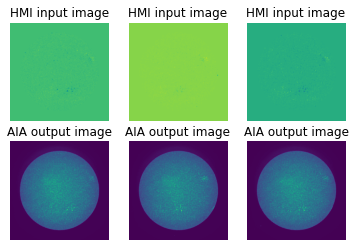

In [122]:
import matplotlib.pyplot as plt

n_samples = 3
for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + i)
    plt.title('HMI input image')
    plt.axis('off')
    plt.imshow(src_images[i].reshape(256, 256)) 

for i in range(n_samples):
    plt.subplot(2, n_samples, 1 + n_samples + i)
    plt.title('AIA output image')
    plt.axis('off')
    plt.imshow(tar_images[i].reshape(256, 256))
plt.show()